<br>
<br>
 <center> <font size = "5"> Data Science Research Methods </font></center>
 <br>
 <center> <font size = "4"> Assessed Coursework 2 </font></center>
 <br>
 <center> <font size = "3"> CandNo: 214331</font></center>
<br>
<br>

---

### 1. Overview

In the context of this assignment we had to use the PAMAP2 Physical Activity Monitoring dataset and come up with some actionable insights for the development of a hardware/software that can determine the amount and the type of physical activity carried out by an individual. In this notebook I have provided my approach including the Exploratory Data Analysis, Hypothesis Testing and Modelling in order to conclude to some useful assumptions regarding the dataset and its possible uses.

<br>

<br>

### 2. Introduction

Automatic recognition of physical activities – commonly referred to as human activity
recognition (HAR) – has emerged as a key research area in human-computer interaction (HCI) and mobile and ubiquitous
computing with many fitness and medical applications [1]. Over the last years more and more electronic devices that measure the user's physical activity are becoming popular, as they help them monitor their physical activity and achieve their fitness goals while also keeping them healthy.

Within this assignment we will try to discover the potential of the PAMAP2 Physical Activity Monitoring dataset by extracting actionable insights that will help in the development of a Human Activity Recognition hardware/software for fitness and activity tracking. However, before analysing the objectives of our approach we will give a more detailed description of the provided dataset and its use.







<br>

#### 2.1 PAMAP2 Physical Activity Monitoring dataset 

PAMAP2 is one of the most well known benchmarked Physical Activity Monitoring datasets  recorded from 9 subjects, wearing 3 inertial measurement units and a heart rate monitor while performing 18 diﬀerent activities [2]. In order to collect the different data 3 Colibri wireless IMUs were used in three different positions on the participants bodies. Specifically, the proposed setup included:

- 1 IMU over the wrist on the dominant arm 
- 1 IMU on the chest 
- 1 IMU on the dominant side's ankle

<img src = 'https://scontent.fath3-4.fna.fbcdn.net/v/t1.0-9/82137556_10215839725293823_4405067064646041600_n.jpg?_nc_cat=107&_nc_ohc=gKDBnPdsX9YAQmR_FzgAffmk2xyh3t2z-4Mdj4k7OitCznU69XdF51AdQ&_nc_ht=scontent.fath3-4.fna&oh=6b7dce498029a235db767a4366534800&oe=5EAE9EBD'  width="200">

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<font size="2">           Figure 1 PAMAP2 Hardware Setup [3]</font>

<br>

Each of the participant had to follow a protocol, containing 12 different physical activities. Furthermore, a list of optional activities was also provided to the participants containing a wide range of everyday, household and sport activities. From this list, 6 activities  were performed by some of the participants reaching at the total of 18 performed activities [4]. 

<br>

The dataset contains synchronized and labeled raw data from all the sensors (3 IMUs and the HR-monitor) that they are merged into 1 data file per subject per session (protocol or optional). Each of the data-files contains 54 columns per row. The columns refers to:

- 1 timestamp
- 2 activityID
- 3 heart rate
- 4-20 IMU hand
- 21- 37 IMU chest
- 38 - 54 IMU ankle

<br>

The IMU sensory data contains information regarding the temparature, orientation as well as data from three different sensors (accelerometer, gyroscope, magnetometer). The first step at this stage was to import the raw data into the notebook and organise them in a panda dataframe.




<br>

<font color='Chocolate ' size = 3> <b>Code for the Data Loading and Organising</b></font>

In [1]:
import pandas as pd

# Create the dataframe
# --------------------

# Defining the column names

general_cols=['timestamp', 'activity_id', 'heart_rate']

# IMU hand
IMU_hand_cols = ['IMU_hand_temp','hand_acceleration_16_1','hand_acceleration_16_2','hand_acceleration_16_3','hand_acceleration_6_1','hand_acceleration_6_2','hand_acceleration_6_3','hand_gyroscope_1','hand_gyroscope_2','hand_gyroscope_3','hand_magnetometer_1','hand_magnetometer_2','hand_magnetometer_3','hand_orient_1','hand_orient_2','hand_orient_3','hand_orient_4']

# IMU chest
IMU_chest_cols = ['IMU_chest_temp','chest_acceleration_16_1','chest_acceleration_16_2','chest_acceleration_16_3','chest_acceleration_6_1','chest_acceleration_6_2','chest_acceleration_6_3','chest_gyroscope_1','chest_gyroscope_2','chest_gyroscope_3','chest_magnetometer_1','chest_magnetometer_2','chest_magnetometer_3','chest_orient_1','chest_orient_2','chest_orient_3','chest_orient_4']

# IMU ankle
IMU_ankle_cols = ['IMU_ankle_temp','ankle_acceleration_16_1','ankle_acceleration_16_2','ankle_acceleration_16_3','ankle_acceleration_6_1','ankle_acceleration_6_2','ankle_acceleration_6_3','ankle_gyroscope_1','ankle_gyroscope_2','ankle_gyroscope_3','ankle_magnetometer_1','ankle_magnetometer_2','ankle_magnetometer_3','ankle_orient_1','ankle_orient_2','ankle_orient_3','ankle_orient_4']

# Concatenate all the column names
col_names = general_cols + IMU_hand_cols + IMU_chest_cols + IMU_ankle_cols

# Initialise the dataframe
PAMAP2 = pd.DataFrame()

# Protocol files 
Protocol_files = [
    'PAMAP2_Dataset/Protocol/subject101.dat',
    'PAMAP2_Dataset/Protocol/subject102.dat',
    'PAMAP2_Dataset/Protocol/subject103.dat',
    'PAMAP2_Dataset/Protocol/subject104.dat',
    'PAMAP2_Dataset/Protocol/subject105.dat',
    'PAMAP2_Dataset/Protocol/subject106.dat',
    'PAMAP2_Dataset/Protocol/subject107.dat',
    'PAMAP2_Dataset/Protocol/subject108.dat',
    'PAMAP2_Dataset/Protocol/subject109.dat'
]

# Fill th dataset with the data
for i in range (0,len(Protocol_files)):
    raw_data = pd.read_table(Protocol_files[i], header=None, sep='\s+')
    raw_data.columns = col_names
    raw_data['participant_id'] = i+1
    PAMAP2 = PAMAP2.append(raw_data, ignore_index=True)

# Print the first rows of the dataframe
PAMAP2.head()

,timestamp,activity_id,heart_rate,IMU_hand_temp,hand_acceleration_16_1,hand_acceleration_16_2,hand_acceleration_16_3,hand_acceleration_6_1,hand_acceleration_6_2,hand_acceleration_6_3,...,ankle_gyroscope_2,ankle_gyroscope_3,ankle_magnetometer_1,ankle_magnetometer_2,ankle_magnetometer_3,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,participant_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


<br>

In the next cell we include some data structures that will be used to retrieve different information regarding the type of the activities (protocol / optional) and the activity id (lying, sitting, rope jumping etc.). In order to construct these structures we used the information provided in the readme.pdf, PAMAP2 Dataset Documentation [4].

<br>

In [2]:
# Mapping the activity ids with the corresponding activity
activity_map = {0: 'other', 1:'lying', 2:'sitting', 3:'standing',4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',9:'watching TV', 
                10:'computer work', 11:'car driving',12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',17:'ironing',
                18:'folding laundry', 19:'house cleaning', 20:'playing soccer', 24:'rope jumping'}

#Protocol Activities
protocol = [1,2,3,17,16,12,13,4,7,6,5,24]

#Optional Activities
optional = [9,10,11,18,19,20]

<br>

Another information that we also wanted to add in our dataset was the intensity of each activity as defined according to its metabolic equivalent of task (MET). MET is a measure of the ratio of the rate at which a person expends energy  while performing some physical activity. The reason that we decided to include this information is because according to the specification our goal is to "develop a hardware and/or software which can determine the amount and type of physical activity carried out by an individual". For this reason we thought that intensity would be a good measure for that. 

According to the World Health Organisation, the physical activity can be categorised as Light intensity, Moderate intensity and Vigorous intensity. However The intensity of different forms of physical activity varies between people. The intensity of physical activity depends on an individuals previous exercise experience and their relative level of fitness [5]. Consequently, the data that we will use would be a compromise in order to be able to conduct a general classification of the intensity of each activity. 

In order to do this classification we used as reference the table below which gives examples of light, moderate and vigorous intensity activities as well as the paper [2].

<br>

<img src = 'https://scontent.fath3-4.fna.fbcdn.net/v/t1.0-9/81377421_10215839725133819_6733818308430135296_n.jpg?_nc_cat=108&_nc_ohc=YZdkzTSogm0AQlbhyREw-FnDdQY0V8ntxj3RPhn5pkPpwEhZdegtXtk4A&_nc_ht=scontent.fath3-4.fna&oh=f5c3abad3821201f18a57efaf42ed7e5&oe=5EB2C322'  width="650">

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<font size="2">           Figure 2 MET Intensity table [6]</font>

<br>

In [3]:
# Classify each activity into Light, Moderate and Vigorous
# --------------------------------------------------------


# Create tables with the categorised activities

# light: lying, sitting, standing and ironing
light = [1,2,3,17]

# moderate:  vacuum cleaning, descending stairs, normal walking, Nordic walking and cycling
moderate = [4,6,7,13,16]

# vigorous:  ascending stairs, running and rope jumping as activities
vigorous = [5,12,24]


# Define a function that does the classification of each activity into
# light, moderate and vigorous

def classify_activity(activity_id):
    
    """ Classifies each activity into light, moderate, vigorous
        according to the MET table

    Parameters
    ----------
    int : activity id
    
 
    Returns
    -------
    String
        'light', 'moderate', 'vigorous'
        
    int
        in case the id of the corresponding activity is not included
        in the specified lists the function returns 0
    """
    
    if activity_id in light:
        return 'light'
    elif activity_id in moderate:
        return 'moderate'
    elif activity_id in vigorous:
        return 'vigorous'
    else:
        return 0
    
    
    
# Initialise a new column for the activity intensity and set all the values to 0

PAMAP2['activity_intensity'] = 0


# Classify the activity intensity of each activity 
# using the classify_activity function

PAMAP2['activity_intensity'] = PAMAP2['activity_id'].apply(classify_activity)

# Print the first rows of the dataframe
PAMAP2.head()

,timestamp,activity_id,heart_rate,IMU_hand_temp,hand_acceleration_16_1,hand_acceleration_16_2,hand_acceleration_16_3,hand_acceleration_6_1,hand_acceleration_6_2,hand_acceleration_6_3,...,ankle_gyroscope_3,ankle_magnetometer_1,ankle_magnetometer_2,ankle_magnetometer_3,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,participant_id,activity_intensity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1,0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1,0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1,0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1,0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1,0


<br>

At this point we have created the initial "raw" dataset containing all protocol data from the 9 different subjects. As we described above, we also added two new columns indicating the participant id (subject id) and the activity intensity. To sum up the final columns of our initial dataframe are:

- 1 timestamp
- 2 activity_id
- 3 heart rate
- 4-20 IMU hand
- 21- 37 IMU chest
- 38 - 54 IMU ankle
- 55 participant_id
- 56 activity_intensity

<br>

#### 2.2  Goal / Motivation 

Our basic goal for this assignment was to derive some actionable insights using the PAMAP2 dataset for developing a hardware/software which can determine the activity intensity carried out by an individual.

As we also mentioned above we decided to classify each activity according to their MET into Light, Moderate and Vigorous intensity. In terms of this assignment, our first objective would be to identify the attributes of the dataset that help us to conduct the described classification problem. Another aspect that we would also examine is the performance of the different devices and sensor locations. The reason for this is that in systems for physical activity monitoring, the number of sensor placements should be kept as low as possible for reasons of practicability and comfort — since users of such systems usually wear them for many hours a day [2].
To sum up our two basic objectives would be:

- Objective 1: Identify whether the attributes of the dataset can be used to classify the different activities according to their intensity level.
<br>

- Objective 2: Find the best combination of the sensing devices and sensor locations to come up with an efficient design of an activity tracking system that would be able to predict the activity intensity (light, moderate, vigorous).


<br>

<br>

### 3. Exploratory Data Analysis

In this section I would describe the Exploratory Data Analysis that we conducted to our dataset. This procedure includes the the data munging and cleaning as well as the plotting of specific variables in order to identify their importance and  correlation to our objectives.


#### 3.1 Data Cleaning

The raw data that they were collected from the users included many "dirty"/damaged data due to technical problems during the data collection phase. 

###### Probelm 1: Missing / NaN values
There were two main reasons for this problem:

- Data dropping due to using wireless sensors. This however only occurred very rarely: the 3 IMUs had a “real” sampling frequency of 99.63Hz, 99.89Hz and 99.65Hz for hand, chest and ankle IMU placement, respectively. 
<br>

- Problems with the hardware setup, causing e.g. connection loss to the dongles or system crash. Due to these problems, some activities for certain subjects are partly or completely missing.

In order to phase this problem we decided to use the interpolate method in order to estimate the NaN values. Interpolate method  ignores the index and treats the values as equally spaced [7]. As our data were continuous values capturing the motion of the participants, the linear interpolation was a good option to accurately predict the missing values of the dataset.
<br>
<br>
###### Probelm 2: Accelerometer calibration
Also, another issue with the data was that accelerometer is not precisely calibrated with the first one. Moreover, due to high impacts caused by certain movements (e.g. during running) with acceleration over 6g, it gets saturated sometimes. Therefore, the use of the data from the first accelerometer (with the scale of ±16g) is recommended [4].

In order to phase this issue we decided to drop the columns corresponding  to the accelerometer with a scale of 6g.
<br>
<br>
###### Probelm 3: Transient activities
The data that they are labelled  with activityID=0 should be discarded in any kind of analysis. These data mainly covers transient activities between performing different activities, e.g. going from one location to the next activity's location, or waiting for the preparation of some equipment [4].

In order to phase this issue we decided to delete the rows with activityID = 0.
<br>
<br>

###### Probelm 4: Missclassified activities
After testing my code I uncover that there is a specific row that includes a missclassified activity. Specifically what have happened is that during the transient time of participant 4 in the row 1405825 instead of 0 the activity id has been marked as 5. 

In order to solve that problem we decided to drop this specific row
<br>
<br>
###### Probelm 5: Invalid orientation data
Finally, according to the PAMAP 2 specification the orientation data are invalid in this data collection. For this reason we decided to delete all the colums that corresponds to the orientation metrics.


At the code below we are trying to clean the dataset from the kind of data described above and create the final dataset that we will conduct our analysis.


<br>

<font color='Chocolate ' size = 3> <b>Code for the Data Cleaning</b></font>

In [4]:
# Drop the columns of the accelerometer with 6g
PAMAP2 = PAMAP2.drop(['hand_acceleration_6_1', 'hand_acceleration_6_2','hand_acceleration_6_3','chest_acceleration_6_1','chest_acceleration_6_2','chest_acceleration_6_3','ankle_acceleration_6_1','ankle_acceleration_6_2','ankle_acceleration_6_3'], axis=1)

# Drop the columns of the orientation metrics
PAMAP2  = PAMAP2.drop(['hand_orient_1', 'hand_orient_2','hand_orient_3','hand_orient_4','chest_orient_1','chest_orient_2','chest_orient_3','chest_orient_4','ankle_orient_1','ankle_orient_2','ankle_orient_3','ankle_orient_4'], axis=1)

# Drop the rows with activityID = 0
PAMAP2 = PAMAP2.drop(PAMAP2[PAMAP2['activity_id']==0].index)

# Drop the row with the missclassified activity
PAMAP2 = PAMAP2.drop(1405825)

# Handle the NaN values
PAMAP2 = PAMAP2.interpolate()

#PAMAP2 = PAMAP2.reset_index(drop=True)

<br>

In order to avoid dealing with eventual transient activities, we also decided to delete 10 seconds from the beginning and the end of each labelled activity. This technique is also being proposed as a preprocessing method at Reiss paper [2].

<br>

In [5]:
# Delete 10 seconds from the beginning and the end of each activity
# -----------------------------------------------------------------


# Identify the activity change and enumerate it
PAMAP2['activity_change'] = ((PAMAP2['activity_id'].shift(1) != PAMAP2['activity_id']) | (PAMAP2['participant_id'].shift(1) != PAMAP2['participant_id'])).astype(int).cumsum()


# Save all the indexes that we want to drop
drop_index = []

for participant in range(1,10):
    
    # Find the initial index of the for loop in order to iterate through the
    # different activity changes of each participant
    if participant == 1:
        initial_index = 1
    else:
        initial_index = PAMAP2[(PAMAP2['participant_id']== participant-1)]['activity_change'].max() + 1
        
        
    # Find the final index of the for loop in order to iterate through the
    # different activity changes of each participant 
    if participant == 9:
        final_index =  PAMAP2[(PAMAP2['participant_id']== participant)]['activity_change'].max()+2
    else:
        final_index = PAMAP2[(PAMAP2['participant_id']== participant)]['activity_change'].max()+1
    
    
    # Find the first and last 10 seconds of each activity and save the corresponding
    # indexes at the drop_index list
    for j in range(initial_index,final_index):
        drop_index += list(PAMAP2[PAMAP2['activity_change']==j].head(10 * 100).index)
        drop_index += list(PAMAP2[PAMAP2['activity_change']==j].tail(10 * 100).index)
        
PAMAP2 = PAMAP2.drop(drop_index)

PAMAP2 = PAMAP2.reset_index(drop=True)

PAMAP2.head()

,timestamp,activity_id,heart_rate,IMU_hand_temp,hand_acceleration_16_1,hand_acceleration_16_2,hand_acceleration_16_3,hand_gyroscope_1,hand_gyroscope_2,hand_gyroscope_3,...,ankle_acceleration_16_3,ankle_gyroscope_1,ankle_gyroscope_2,ankle_gyroscope_3,ankle_magnetometer_1,ankle_magnetometer_2,ankle_magnetometer_3,participant_id,activity_intensity,activity_change
0,47.66,1,103.0,30.5,-7.76319,-6.59656,0.831271,-0.023345,-0.094827,0.200758,...,-3.44087,0.100157,-0.328539,0.148857,-74.7494,-45.4312,-41.3917,1,light,1
1,47.67,1,103.0,30.5,-7.96283,-6.78714,0.559511,0.119344,-0.173491,0.228492,...,-3.74644,0.022160,-0.316792,0.150338,-76.0839,-46.1565,-41.3886,1,light,1
2,47.68,1,103.0,30.5,-7.56159,-6.94546,0.181182,0.293628,-0.223687,0.237504,...,-4.02024,0.000155,-0.259867,0.156328,-75.4083,-45.9693,-40.6494,1,light,1
3,47.69,1,103.0,30.5,-7.27130,-7.14018,-0.121712,0.516965,-0.241007,0.224821,...,-4.13076,-0.003502,-0.218614,0.199243,-76.1764,-46.5085,-39.5349,1,light,1
4,47.70,1,103.0,30.5,-7.19573,-6.95140,-0.159704,0.646473,-0.272410,0.216307,...,-4.24880,-0.015711,-0.279977,0.195484,-76.4170,-45.6111,-40.0185,1,light,1


<br>

After the drop of the 10 first and 10 last seconds of each activity we observed that the 'activity change' 79 was dissapeared as it had a total duration of 2.55 sec. This can also be validated with the table in PerformedActivitiesSummary.pdf. According to this table we can also see that the final activity of the participant 6 (which corresponds to the activity change 79) has a total duration of 2.55 seconds. So after the dropping of the 10 first / last seconds this activity change will be entirely lost.

<img src = 'https://scontent.fath3-4.fna.fbcdn.net/v/t1.0-9/81898786_10215839725573830_4984368302160609280_o.jpg?_nc_cat=107&_nc_ohc=7gJ4N70HpN0AQkdDqc2UNC9iiPIrPD_C5AJHSxIw_gUOUPAe6O4v3vf5w&_nc_ht=scontent.fath3-4.fna&oh=12c4c4f1829b2bb26c33634110a85a03&oe=5EA6EA67'  width="950">

<br>

In order to overcome this issue we decided to enumerate the activity changes again. By doing this, we managed to not count the rope jumping activity of the participant 6 as an activity change as it was no longer on our dataframe.

<br>

In [6]:
# Identify the activity change and enumerate it
PAMAP2['activity_change'] = ((PAMAP2['activity_id'].shift(1) != PAMAP2['activity_id']) | (PAMAP2['participant_id'].shift(1) != PAMAP2['participant_id'])).astype(int).cumsum()

<br>

#### 3.2 Segmetation 

According to the Reiss paper another important step of the preprocessing phase is the segmentation. Previous work shows that the best way to achieve this is by a sliding window technique. According to Reiss paper [2], to obtain at least 2 or 3 periods of all diﬀerent periodic movements, a window length of about 3-5 seconds is reasonable. Therefore, as it is also proposed in the paper, a window size of 512 samples was selected because according to previous approaches had a very good performance. The preprocessed data is segmented using a sliding window with the deﬁned  <b>5.12 seconds of window size</b> , shifted by 1 second between consecutive windows [2].

In the code below, we have implemented the described sliding window operation and we have created our segments for each activity.


In [7]:
# Segmentation: Creating segments/windows of 5.12 seconds size shifted by 1 second
# --------------------------------------------------------------------------------

# Make a deep copy of our preprocessed PAMAP2
PAMAP = PAMAP2.copy()

# Find the max number of activity changes
activity_changes = PAMAP['activity_change'].max()


# Find the starting and the ending index of each activity
activity_indexes = []
for act in range(1,activity_changes+1):
    start = PAMAP[PAMAP['activity_change'] == act].first_valid_index()
    finish = PAMAP[PAMAP['activity_change'] == act].last_valid_index()
    activity_indexes.append((start,finish))
    
    
# Find the segments of each activity 
segments = []
for i in range(0,len(activity_indexes)):

    # Initialise the starting and the finishing index
    # of each activity
    start_index = activity_indexes[i][0]
    finish_index = activity_indexes[i][1]
    
    while(start_index + 512 < finish_index):
        
        segments.append(PAMAP.iloc[start_index:start_index+512,:])
        start_index = start_index +100 # Shift the window buy 1 sec

<br>

#### 3.3 Feature Extraction 

The next step after creating the segmented data was the feature extraction.Using the segmented data we managed to extract some features and create our final dataset. According to the Reiss paper some of the  most useful features to extract are [2] :

<br>
<b>3D-acceleration,magnetometer and gyroscope data :</b>

- Mean
- Standard Deviation 

<br>
<b>Heart rate data :</b>
<br>
From the heart rate data, the features (normalized) mean and gradient are calculated. Normalization is done on the interval deﬁned by resting and maximum HR, and proved to be useful in previous approaches.

- Mean
- Standard Deviation

In [8]:
import numpy as np
# Initialise a new Panda dataframe to hold the extracted data

features = pd.DataFrame(columns = ['participant_id','activity_id','activity_intensity','Heart_Rate_Mean','Heart_Rate_STD','Heart_Rate_Gradient',
                                   # Hand Data
                                  'Hand_Acceleration_1_Mean', 'Hand_Acceleration_2_Mean', 'Hand_Acceleration_3_Mean','Hand_Acceleration_1_STD',
                                  'Hand_Acceleration_2_STD','Hand_Acceleration_3_STD',
                                  'Hand_Gyroscope_1_Mean', 'Hand_Gyroscope_2_Mean', 'Hand_Gyroscope_3_Mean','Hand_Gyroscope_1_STD',
                                  'Hand_Gyroscope_2_STD','Hand_Gyroscope_3_STD',
                                  'Hand_Magnetometer_1_Mean', 'Hand_Magnetometer_2_Mean', 'Hand_Magnetometer_3_Mean','Hand_Magnetometer_1_STD',
                                  'Hand_Magnetometer_2_STD','Hand_Magnetometer_3_STD',
                                  
                                   # Chest Data
                                  'Chest_Acceleration_1_Mean', 'Chest_Acceleration_2_Mean', 'Chest_Acceleration_3_Mean','Chest_Acceleration_1_STD',
                                  'Chest_Acceleration_2_STD','Chest_Acceleration_3_STD',                
                                  'Chest_Gyroscope_1_Mean', 'Chest_Gyroscope_2_Mean', 'Chest_Gyroscope_3_Mean','Chest_Gyroscope_1_STD',
                                  'Chest_Gyroscope_2_STD','Chest_Gyroscope_3_STD',                            
                                  'Chest_Magnetometer_1_Mean', 'Chest_Magnetometer_2_Mean', 'Chest_Magnetometer_3_Mean','Chest_Magnetometer_1_STD',
                                  'Chest_Magnetometer_2_STD','Chest_Magnetometer_3_STD',
                                   
                                   # Ankle Data
                                  'Ankle_Acceleration_1_Mean', 'Ankle_Acceleration_2_Mean', 'Ankle_Acceleration_3_Mean','Ankle_Acceleration_1_STD',
                                  'Ankle_Acceleration_2_STD','Ankle_Acceleration_3_STD',                
                                  'Ankle_Gyroscope_1_Mean', 'Ankle_Gyroscope_2_Mean', 'Ankle_Gyroscope_3_Mean','Ankle_Gyroscope_1_STD',
                                  'Ankle_Gyroscope_2_STD','Ankle_Gyroscope_3_STD',                            
                                  'Ankle_Magnetometer_1_Mean', 'Ankle_Magnetometer_2_Mean', 'Ankle_Magnetometer_3_Mean','Ankle_Magnetometer_1_STD',
                                  'Ankle_Magnetometer_2_STD','Ankle_Magnetometer_3_STD'])

In [9]:
# Fill the new dataframe by extracting information from our segments

for i in range(0,len(segments)):
    
    new_row = {'participant_id': segments[i]['participant_id'].iloc[0], 'activity_id': segments[i]['activity_id'].iloc[0],
              'activity_intensity':segments[i]['activity_intensity'].iloc[0],'Heart_Rate_Mean': segments[i]['heart_rate'].mean(),
              'Heart_Rate_STD':  segments[i]['heart_rate'].std(), 'Heart_Rate_Gradient': np.gradient(np.array(segments[i]['heart_rate'])).mean(),
               
               # Hand Data
              'Hand_Acceleration_1_Mean': segments[i]['hand_acceleration_16_1'].mean(), 'Hand_Acceleration_2_Mean': segments[i]['hand_acceleration_16_2'].mean(),
              'Hand_Acceleration_3_Mean': segments[i]['hand_acceleration_16_3'].mean(),'Hand_Acceleration_1_STD':segments[i]['hand_acceleration_16_1'].std(), 
              'Hand_Acceleration_2_STD':segments[i]['hand_acceleration_16_2'].std(),'Hand_Acceleration_3_STD':segments[i]['hand_acceleration_16_3'].std(),
              'Hand_Gyroscope_1_Mean': segments[i]['hand_gyroscope_1'].mean(), 'Hand_Gyroscope_2_Mean': segments[i]['hand_gyroscope_2'].mean(),
              'Hand_Gyroscope_3_Mean': segments[i]['hand_gyroscope_3'].mean(),'Hand_Gyroscope_1_STD':segments[i]['hand_gyroscope_1'].std(), 
              'Hand_Gyroscope_2_STD':segments[i]['hand_gyroscope_2'].std(),'Hand_Gyroscope_3_STD':segments[i]['hand_gyroscope_3'].std(),
              'Hand_Magnetometer_1_Mean': segments[i]['hand_magnetometer_1'].mean(), 'Hand_Magnetometer_2_Mean': segments[i]['hand_magnetometer_2'].mean(),
              'Hand_Magnetometer_3_Mean': segments[i]['hand_magnetometer_3'].mean(),'Hand_Magnetometer_1_STD':segments[i]['hand_magnetometer_1'].std(), 
              'Hand_Magnetometer_2_STD':segments[i]['hand_magnetometer_2'].std(),'Hand_Magnetometer_3_STD':segments[i]['hand_magnetometer_3'].std(),
              
              # Chest Data
              'Chest_Acceleration_1_Mean': segments[i]['chest_acceleration_16_1'].mean(), 'Chest_Acceleration_2_Mean': segments[i]['chest_acceleration_16_2'].mean(),
              'Chest_Acceleration_3_Mean': segments[i]['chest_acceleration_16_3'].mean(),'Chest_Acceleration_1_STD':segments[i]['chest_acceleration_16_1'].std(), 
              'Chest_Acceleration_2_STD':segments[i]['chest_acceleration_16_2'].std(),'Chest_Acceleration_3_STD':segments[i]['chest_acceleration_16_3'].std(),
              'Chest_Gyroscope_1_Mean': segments[i]['chest_gyroscope_1'].mean(), 'Chest_Gyroscope_2_Mean': segments[i]['chest_gyroscope_2'].mean(),
              'Chest_Gyroscope_3_Mean': segments[i]['chest_gyroscope_3'].mean(),'Chest_Gyroscope_1_STD':segments[i]['chest_gyroscope_1'].std(), 
              'Chest_Gyroscope_2_STD':segments[i]['chest_gyroscope_2'].std(),'Chest_Gyroscope_3_STD':segments[i]['chest_gyroscope_3'].std(),
              'Chest_Magnetometer_1_Mean': segments[i]['chest_magnetometer_1'].mean(), 'Chest_Magnetometer_2_Mean': segments[i]['chest_magnetometer_2'].mean(),
              'Chest_Magnetometer_3_Mean': segments[i]['chest_magnetometer_3'].mean(),'Chest_Magnetometer_1_STD':segments[i]['chest_magnetometer_1'].std(), 
              'Chest_Magnetometer_2_STD':segments[i]['chest_magnetometer_2'].std(),'Chest_Magnetometer_3_STD':segments[i]['chest_magnetometer_3'].std(),
              
               # Ankle Data
              'Ankle_Acceleration_1_Mean': segments[i]['ankle_acceleration_16_1'].mean(), 'Ankle_Acceleration_2_Mean': segments[i]['ankle_acceleration_16_2'].mean(),
              'Ankle_Acceleration_3_Mean': segments[i]['ankle_acceleration_16_3'].mean(),'Ankle_Acceleration_1_STD':segments[i]['ankle_acceleration_16_1'].std(), 
              'Ankle_Acceleration_2_STD':segments[i]['ankle_acceleration_16_2'].std(),'Ankle_Acceleration_3_STD':segments[i]['ankle_acceleration_16_3'].std(),
              'Ankle_Gyroscope_1_Mean': segments[i]['ankle_gyroscope_1'].mean(), 'Ankle_Gyroscope_2_Mean': segments[i]['ankle_gyroscope_2'].mean(),
              'Ankle_Gyroscope_3_Mean': segments[i]['ankle_gyroscope_3'].mean(),'Ankle_Gyroscope_1_STD':segments[i]['ankle_gyroscope_1'].std(), 
              'Ankle_Gyroscope_2_STD':segments[i]['ankle_gyroscope_2'].std(),'Ankle_Gyroscope_3_STD':segments[i]['ankle_gyroscope_3'].std(),
              'Ankle_Magnetometer_1_Mean': segments[i]['ankle_magnetometer_1'].mean(), 'Ankle_Magnetometer_2_Mean': segments[i]['ankle_magnetometer_2'].mean(),
              'Ankle_Magnetometer_3_Mean': segments[i]['ankle_magnetometer_3'].mean(),'Ankle_Magnetometer_1_STD':segments[i]['ankle_magnetometer_1'].std(), 
              'Ankle_Magnetometer_2_STD':segments[i]['ankle_magnetometer_2'].std(),'Ankle_Magnetometer_3_STD':segments[i]['ankle_magnetometer_3'].std()}
    
    features = features.append(new_row, ignore_index=True)
features.head()

,participant_id,activity_id,activity_intensity,Heart_Rate_Mean,Heart_Rate_STD,Heart_Rate_Gradient,Hand_Acceleration_1_Mean,Hand_Acceleration_2_Mean,Hand_Acceleration_3_Mean,Hand_Acceleration_1_STD,...,Ankle_Gyroscope_3_Mean,Ankle_Gyroscope_1_STD,Ankle_Gyroscope_2_STD,Ankle_Gyroscope_3_STD,Ankle_Magnetometer_1_Mean,Ankle_Magnetometer_2_Mean,Ankle_Magnetometer_3_Mean,Ankle_Magnetometer_1_STD,Ankle_Magnetometer_2_STD,Ankle_Magnetometer_3_STD
0,1,1,light,103.951172,0.806217,0.003906,-1.879247,4.788385,6.990495,3.537610,...,0.407518,0.487445,0.475134,0.914165,-28.982221,30.539392,-20.016810,25.077719,21.915749,9.655650
1,1,1,light,104.509766,0.953599,0.007724,-0.185149,5.695728,7.785865,1.379208,...,0.046104,0.330346,0.202734,0.258369,-17.780068,39.737745,-15.812959,3.354951,3.436146,4.171120
2,1,1,light,105.253906,1.095747,0.005859,0.319354,5.626324,7.950312,0.448136,...,0.037852,0.263208,0.102134,0.237929,-16.907718,40.888615,-14.050256,3.456781,3.619357,4.453938
3,1,1,light,105.839844,1.070337,0.005859,0.322273,5.483047,8.098098,0.326656,...,0.053858,0.199840,0.088332,0.207533,-15.847628,42.200263,-12.285197,2.891303,3.319480,4.263248
4,1,1,light,106.339844,0.854630,0.003906,0.316246,5.702229,7.966321,0.102892,...,0.039167,0.156057,0.079210,0.198518,-14.550016,43.889634,-10.007706,0.993823,0.935536,1.897193


<br>

At this point we have created the final dataset (features) that we will use to conduct our EDA analysis. This dataset has been produced after the feature extraction of the 16818 segments that we set in the previous step. The final dataset contains 60 columns including the participant_id, activity_id, activity intensity and the mean / std values of our devices (heart rate, accelerometer, Gyroscope, Magnetometer) from the different locations (hand, chest, ankle).

<br>

#### 3.5 Plotting

The last part of the EDA was to plot some variables and observe our preprocessed data. During this section we will understand the numerical value of the categorical data, identify relationships and correlations between different variables and finally understand the structure and the behauviour of our data.

#### 3.5.1 Activities occurences

The first plotting that we decided to do was to identify the frequency / occurences of each of the conducted activities using the extracted data from the segments.

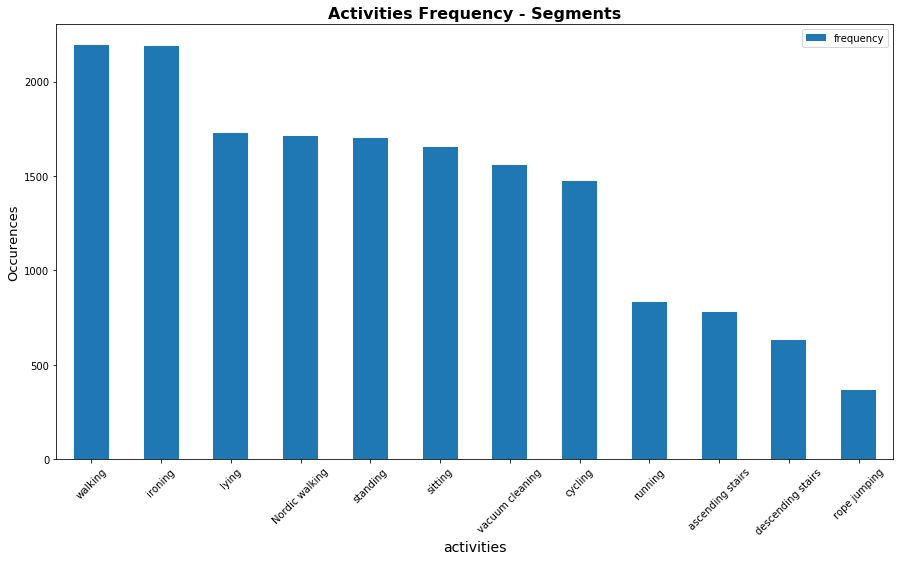

In [36]:
import matplotlib
from matplotlib import pyplot as plt

# Find the Frequency of each activity from the features data
# ----------------------------------------------------------

# Count the frequency of each activity
freq_act = features['activity_id'].value_counts()

# Create a new dataframe with the activity_id and the corresponding frequency
freq_act = freq_act.to_frame()
freq_act.reset_index(level=0, inplace=True)
freq_act.columns = ['activity_id','frequency']

# Sort the dataframe according to the activity frequency
freq_act = freq_act.sort_values(by='frequency',ascending=False)

# Replace the activy id with actual name
freq_act = freq_act.replace({'activity_id':activity_map})

freq_act.plot(kind='bar',x='activity_id',y='frequency',figsize=(15,8),rot= 45)
plt.title('Activities Frequency - Segments' , fontsize=16,fontweight='bold')
plt.xlabel('activities',fontsize=14)
plt.ylabel('Occurences',fontsize=13)
plt.show()

<br>

The 'Activities Frequency' diagram above expresses the occurences of each activity in the specifed segments. According to that diagram, the most frequent activities are the 4 and 17 (walking and ironing). In the cell below, we will produce the same diagram using the whole preprocessed PAMAP dataset and not the extracted features.

<br>

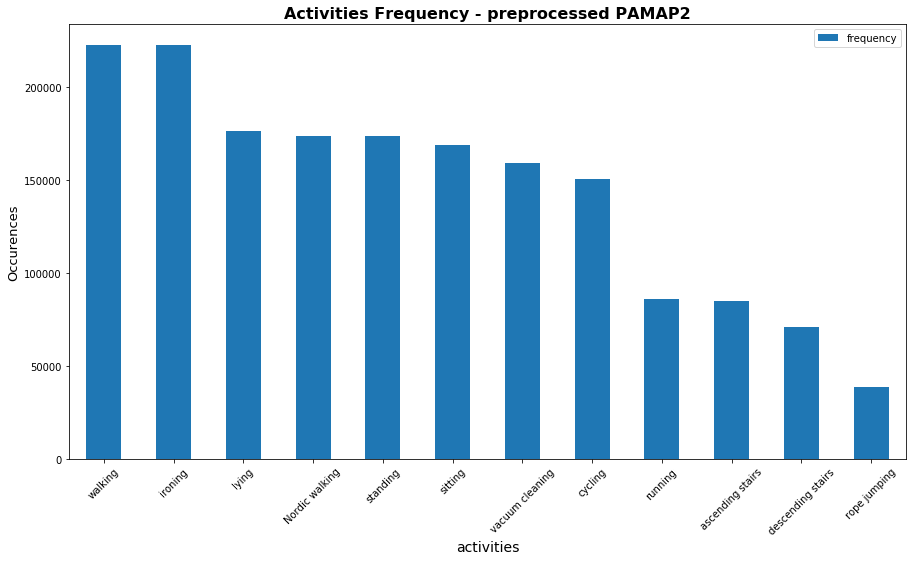

In [11]:
# Find the Frequency of each activity from the PAMAP2
# ----------------------------------------------------


# Count the frequency of each activity
freq_act = PAMAP['activity_id'].value_counts()

# Create a new dataframe with the activity_id and the corresponding frequency
freq_act = freq_act.to_frame()
freq_act.reset_index(level=0, inplace=True)
freq_act.columns = ['activity_id','frequency']

# Sort the dataframe according to the activity frequency
freq_act = freq_act.sort_values(by='frequency',ascending=False)

# Replace the activy id with actual name
freq_act = freq_act.replace({'activity_id':activity_map})

freq_act.plot(kind='bar',x='activity_id',y='frequency',figsize=(15,8),rot= 45)
plt.title('Activities Frequency - preprocessed PAMAP2' , fontsize=16,fontweight='bold')
plt.xlabel('activities',fontsize=14)
plt.ylabel('Occurences',fontsize=13)
plt.show()

<br>

Observing the the Activities Frequency diagram that we produced from the preprocessed PAMAP2 dataset, we can easily identfy that it is really similar to the Activities Frequency diagram that we produced using the extracted features from the segmented data. That means that our segmentation proccess is sucessful and manages to capture the paterns of the initial data. Finally, the produced diagrams are also compatible with the PerformedActivitiesSummary.pdf from the PAMAP2 documentation files.

<br>

#### 3.5.2 Activity Intensity Occurences 

As we also mentioned in the introduction of the report, one aspect of this assignment would be to classify each activity according to its MET (light, moderate, vigorous). At this stage we will plot the occurences of each category using the extracted data from the segments. By doing this we will understand what proportion of data corresponds to each activity intensity.

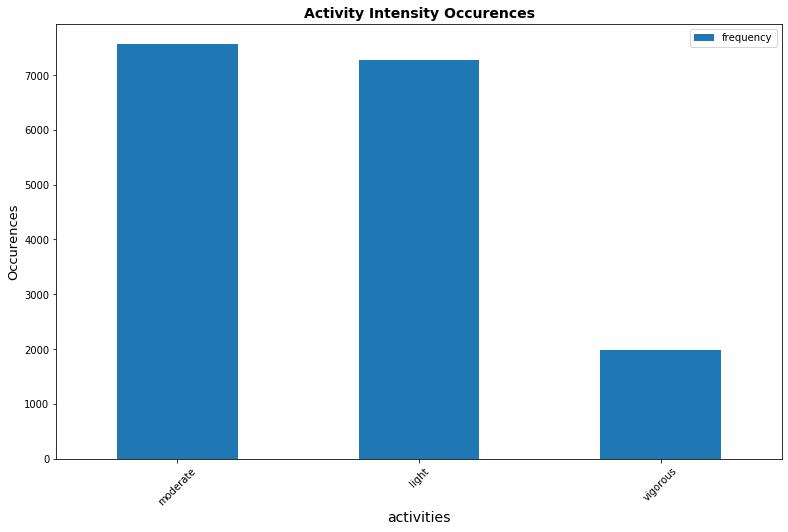

In [12]:
# Find the Occurences of each activity intensity 
# ----------------------------------------------

freq_intensity = features['activity_intensity'].value_counts()

# Create a new dataframe with the activity_intesity and the corresponding frequency
freq_intensity = freq_intensity.to_frame()
freq_intensity.reset_index(level=0, inplace=True)
freq_intensity.columns = ['activity_intensity','frequency']
freq_intensity

# Sort the dataframe according to the activity frequency
freq_intensity = freq_intensity.sort_values(by='frequency',ascending=False)


freq_intensity.plot(kind='bar',x='activity_intensity',y='frequency',figsize=(13,8),rot= 45)
plt.title('Activity Intensity Occurences' , fontsize=14,fontweight='bold')
plt.xlabel('activities',fontsize=14)
plt.ylabel('Occurences',fontsize=13)
plt.show()

<br>

According to the Activity Intensity Occurences diagram we observe that the majority of the conducted activities are moderate / light and only a small percentage of activities are classified as vigorous. Specifically, according to the pie chart below:

- 45 % of the activites are classified as moderate
- 43.3 % of the activities are classified as light
- 11.8 % of the activities are classified as vigorous

<br>

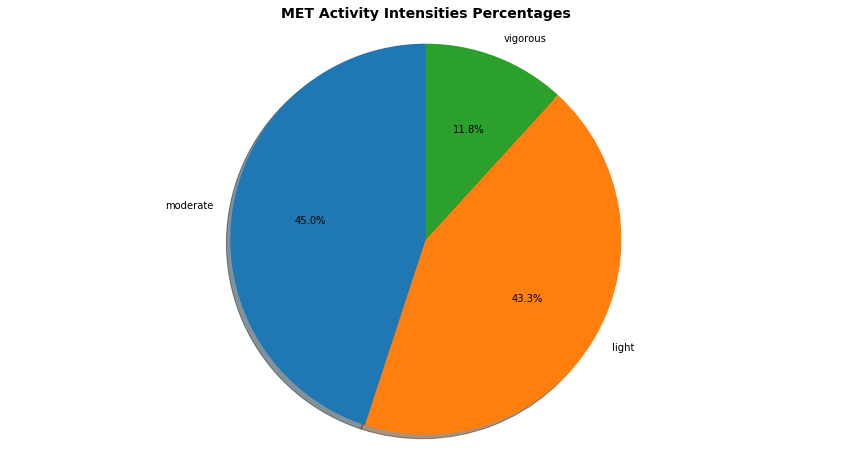

In [13]:
all_activities_intensities = freq_intensity['frequency'].sum()

moderate = (freq_intensity[freq_intensity['activity_intensity'] == 'moderate']['frequency'] / all_activities_intensities) * 100
light = (freq_intensity[freq_intensity['activity_intensity'] == 'light']['frequency'] / all_activities_intensities) * 100
vigorous = (freq_intensity[freq_intensity['activity_intensity'] == 'vigorous']['frequency'] / all_activities_intensities) * 100

labels = 'moderate', 'light','vigorous'
sizes = [moderate[0], light[1], vigorous[2]]
explode = (0.0, 0.0, 0.0) 

fig1, ax1 = plt.subplots()
fig1.set_size_inches(15, 8)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('MET Activity Intensities Percentages', fontsize=14,fontweight='bold')
plt.show()


<br>

At this point we have a first idea regarding our data and their numerical value. The next step was to plot some data from the different deviced and activities and observe their patterns.

<br>

#### 3.5.3 Plotting Accelerometer, Gyroscope and Magnetometer Data

<br>

At this section of the EDA we are trying to understand the structure of the different sensor's devices and location data. The idea for these data is that they should form different patterns for each activity in order to be able to be classified by different models. In order to visualise the time series data we created the 'plot_data' function which takes as arguments the activity_id and the sensor's locations and plots the time series data for all of the three different sensor devices (accelerometer, magnetometer and gyroscope).

<br>

In [14]:
def plot_data(activity_id,location):
        
    """plot data is a custom function that plots the time series data
    of the different devices and sensor's locations. It takes as input
    the activity_id and the sensor's location and plot the time series
    data of the three different devices (accelerometer, gyroscope,ma-
    gnetometer)

    Parameters
    ----------
    int : activity_id
    
    String : 'Hand', 'Ankle', 'Chest'
    
    """
    
    # Create a dataframe with the data of the specific activity
    df1=features[(features['activity_id']==activity_id)]
    
    # Acceloremoter Data
    x_acc = np.array(df1[location+'_Acceleration_1_Mean'])
    y_acc = np.array(df1[location+'_Acceleration_2_Mean'])
    z_acc = np.array(df1[location+'_Acceleration_3_Mean'])
    
    
    # Gyroscope Data
    x_gyro = np.array(df1[location+'_Gyroscope_1_Mean'])
    y_gyro = np.array(df1[location+'_Gyroscope_2_Mean'])
    z_gyro = np.array(df1[location+'_Gyroscope_3_Mean'])
    
    # Magnetometer Data
    x_magn = np.array(df1[location+'_Magnetometer_1_Mean'])
    y_magn = np.array(df1[location+'_Magnetometer_2_Mean'])
    z_magn = np.array(df1[location+'_Magnetometer_3_Mean'])
    
    # Find the number of segments
    segm = np.arange(len(x_acc))
    
    # Plot the data
    plt.figure(figsize=(18,16))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.8)
    plt.subplot(3,1,1)
    plt.plot(segm, x_acc, 'r') # plotting t, a separately 
    plt.plot(segm, y_acc, 'b') # plotting t, b separately 
    plt.plot(segm, z_acc, 'g') # plotting t, c separately 
    plt.title('Accelerometer Mean '+location+' Metrics : '+activity_map[activity_id],fontweight='bold')
    plt.xlabel('segments')
    plt.ylabel('Mean metrics of the x,y,z axis')

    plt.subplot(3,1,2)
    plt.plot(segm, x_gyro, 'r') # plotting t, a separately 
    plt.plot(segm, y_gyro, 'b') # plotting t, b separately 
    plt.plot(segm, z_gyro, 'g') # plotting t, c separately 
    plt.title('Gyroscope Mean '+location+' Metrics : '+activity_map[activity_id],fontweight='bold')
    plt.xlabel('segments')
    plt.ylabel('Mean metrics of the x,y,z axis')

    plt.subplot(3,1,3)
    plt.plot(segm, x_magn, 'r') # plotting t, a separately 
    plt.plot(segm, y_magn, 'b') # plotting t, b separately 
    plt.plot(segm, z_magn, 'g') # plotting t, c separately 
    plt.title('Magnetometer Mean '+location+' Metrics : '+activity_map[activity_id],fontweight='bold')
    plt.xlabel('segments')
    plt.ylabel('Mean metrics of the x,y,z axis')


<br>

Using the plot_data function we decided to visualise the time series data for the cycling activity for all the possible combinations of the sensor devices and locations. In order to plot our data we used the features dataframe which contained the extracted features of each segment. So the x-axis represents the different segments and the y-axis represents the Mean metrics of each activity. Each diagram contains three different lines.The red corresponds to the metrics of the x-axis , the blue corresponds to the metrics of the y-axis and the green corresponds to the metrics of the z-axis.

<br>

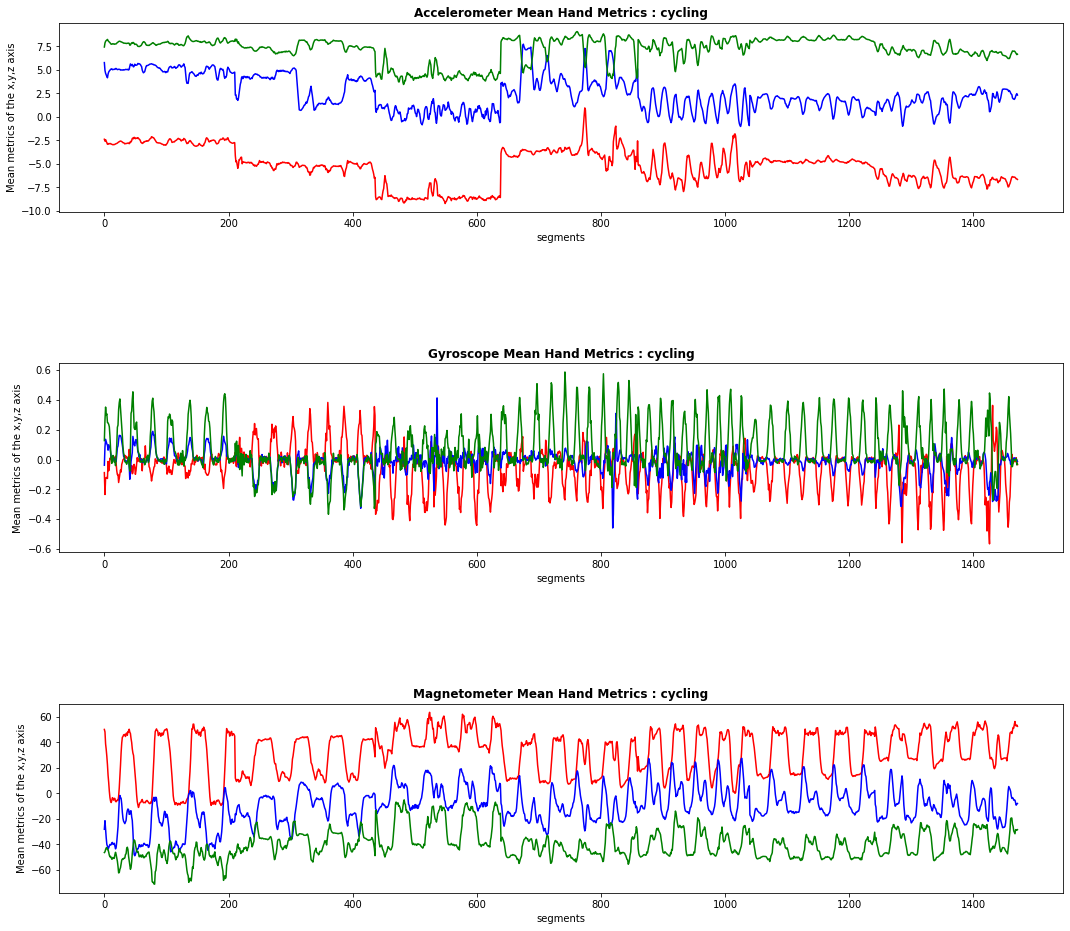

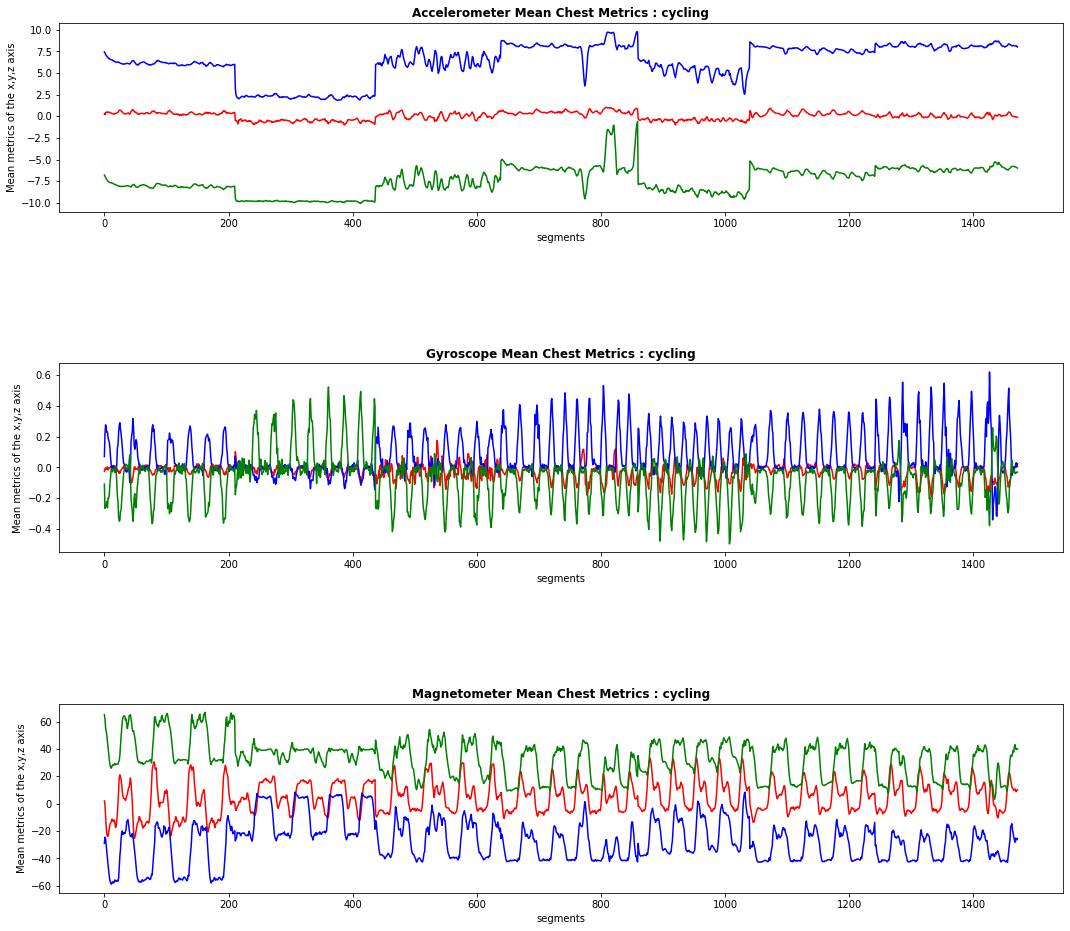

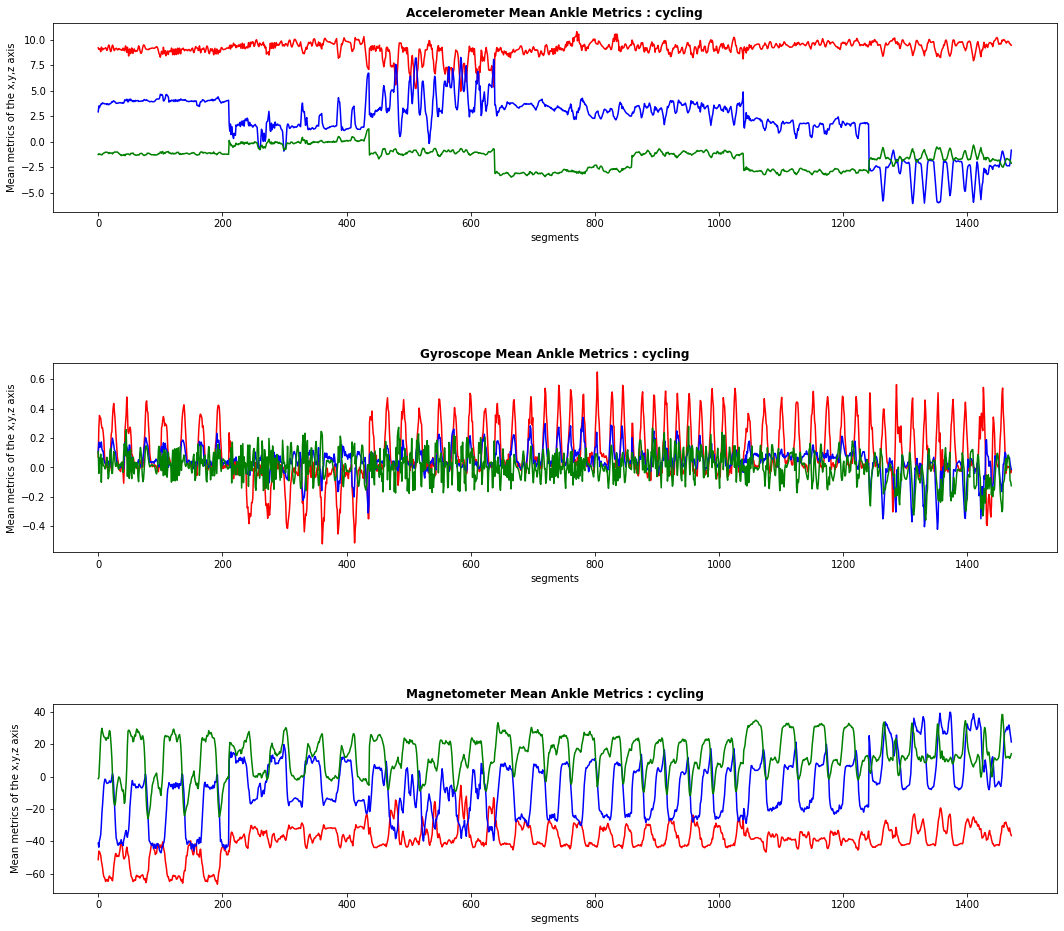

In [15]:
# Plot the time series data for the cycling activity for all the possible combinations
# of the sensor locations and devices

sensors_location = ['Hand','Chest','Ankle']

for i in sensors_location:
    plot_data(6,i)
    

<br>

Looking at the data from the different sensor location and devices we observed that the data of the Accelerometer and and Magnetometer looked more distinguishable than the Gyroscope ones. However although that they seem to be easier to differentiate, we will investigate their actual importance in the Modelling part that we will use them to train and evaluate classification models. 

<br>

<br>

#### 3.5.4 Heart Rate - Activity Intensity Relationship

<br>

In the last step of the EDA we will look into the Heart Rate and the Activity Intensity columns exploring for any possible relationship between them. In order to conduct this analysis, we decided to create heatmap of the different activity intesity categories  and the heart rate. 

The first step for the heatmap creation was to select the corresponding data and transform them in the correct form.

<br>

In [16]:
# Select the corresponding columns and group them by activity_intensity and participant_id
df = features.groupby(['activity_intensity','participant_id'], as_index=False).mean() \
            [['activity_intensity','participant_id','Heart_Rate_Mean']]

# Reshape our data and prepare them for the heatmap
df = df.pivot(index='activity_intensity', columns='participant_id', values='Heart_Rate_Mean')

df

participant_id,1,2,3,4,5,6,7,8,9
activity_intensity,,,,,,,,,
light,94.581092,84.670833,79.439203,91.537166,84.125808,80.712448,72.917172,80.587310,NaN
moderate,130.610658,119.353015,111.868476,120.599316,114.865162,110.116339,111.426856,120.333878,NaN
vigorous,159.313360,141.611921,125.717337,132.385247,149.754156,151.325941,123.359147,162.167875,148.026228


<br>

Consequently, using the 'heatmap' and 'annotate_heatmap' functions from [8] we created our final heatmap diagram regarding the Mean Heart Rate and the intensity level of the activity of each participant.

<br>

##### Heat Map Functions

In [17]:
import matplotlib


def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


#----------------------------------------------------------------------------------------


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

C:\Users\44787\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\44787\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


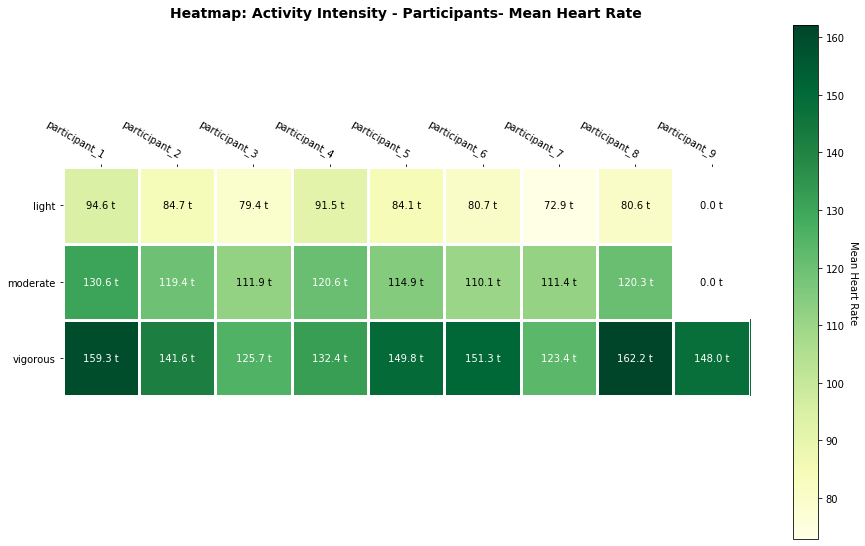

In [18]:
# Initialise the variables for the heatmapping
intensity_level = ["light", "moderate", "vigorous"]
     
participants = ['participant_1','participant_2','participant_3','participant_4','participant_5','participant_6','participant_7','participant_8','participant_9']

heart_rate_values = np.array(df)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(13,8))
plt.title('Heatmap: Activity Intensity - Participants- Mean Heart Rate', fontsize=14,fontweight='bold',pad=150)

im, cbar = heatmap(heart_rate_values, intensity_level, participants, ax=ax,
                   cmap="YlGn", cbarlabel="Mean Heart Rate")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()



<br>

According to the produced heatmap diagram we can clearly identify that there is a correlation between the activity intensity and the heart rate. Specifically, the more intense a activity is the higher the heart rate would be. Taking into account this observation we understood that the heart rate would be one of the important variables regarding the activity intensity classification task.

<br>

### 4. Hypothesis- Relationships between single pair of attributes

According to our Explanatory Data Analysis we concluded that there is a noticable correlation between the heart rate and the activity intensity. We found out that the more intense the activity is, the higher the heart rate would be. At the Hypothesis section we will further investigate this relationship in order to find out if there is a significant difference between the mean heart rate between the three avtivity intensity categories.

<br>

#### 4.1 Normality check

<br>

However, before conducting the tests and find out whether there is a significant difference between the Mean Heart Rate of each category, we shoud check if our data approximate a normal distribution. In order to do this we will conduct a normality check.

<br>

In [19]:
# Get the Mean heart Rate data for the three different activity intensity categories

light = features[(features['activity_intensity'] == 'light')]['Heart_Rate_Mean']

moderate = features[(features['activity_intensity'] == 'moderate')]['Heart_Rate_Mean']

vigorous = features[(features['activity_intensity'] == 'vigorous')]['Heart_Rate_Mean']

<br>

In order to conduct the normality check we will plot their histograms and run a normal test. Normal test is designed to determine whether the distribution of interest deviates from a normal distribution. Therefore the null hypothesis is that it does not deviate from normal, and the alternative is that it does. A p-value is returned associated with the test statistic and if this is lower than the criterion alpha, then we would conclude in favour of the alternative. If it is not lower than the criterion, then you can conclude that there is no evidence that the distribution deviates from normality. For the purpose of this test we will set α: 0.05.

<br>

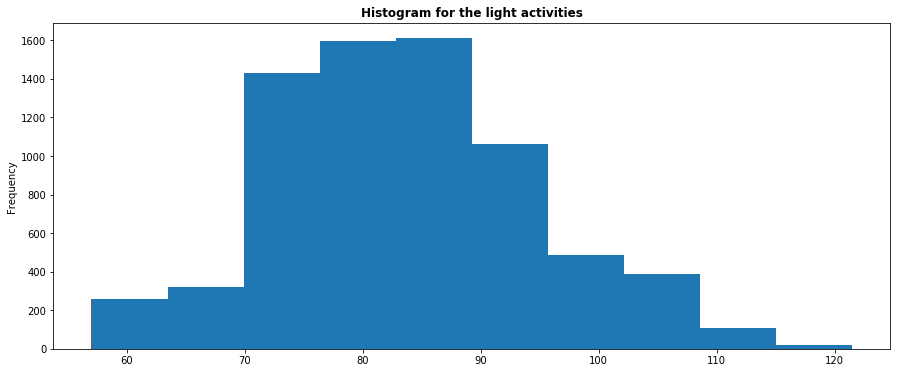

In [20]:
# Plot histogram for the light activities
light.plot(kind='hist',figsize=(15,6))
plt.title('Histogram for the light activities' , fontsize=12,fontweight='bold')
plt.show()

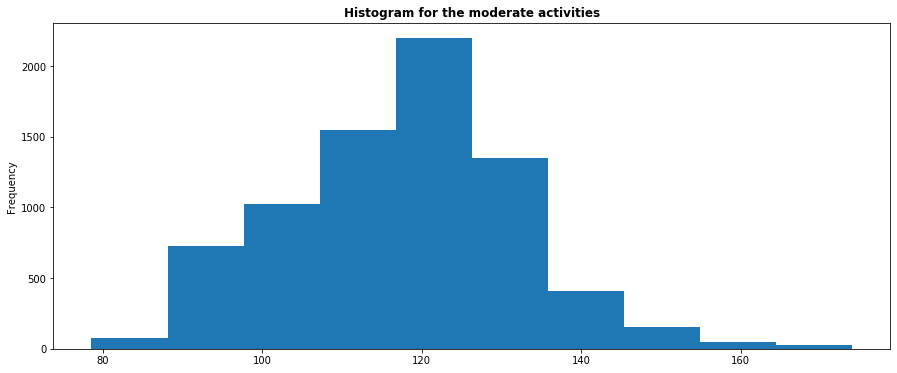

In [21]:
# Plot histigram for the moderate activities
moderate.plot(kind='hist',figsize=(15,6))
plt.title('Histogram for the moderate activities' , fontsize=12,fontweight='bold')
plt.show()

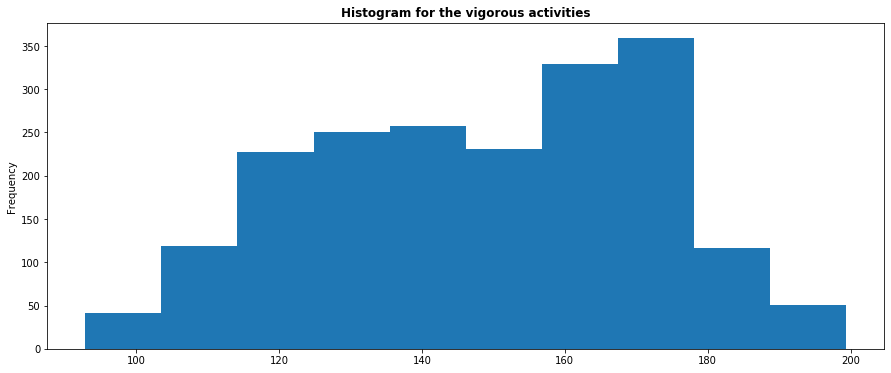

In [22]:
## Plot histigram for the vigorous activities
vigorous.plot(kind='hist',figsize=(15,6))
plt.title('Histogram for the vigorous activities' , fontsize=12,fontweight='bold')
plt.show()

<br>

From the plotted histograms we cannot directly understand whether the data follow a normal distribution or not. For this reason we also conducted a Normal test.

<br>

In [23]:
import scipy.stats as stats

# Normal Test on Light Mean Heart Rates
light_norm_test = stats.normaltest(light)
W_light = light_norm_test[0]
p_light = light_norm_test[1]

# Normal Test on Moderate Mean Heart Rates
moderate_norm_test = stats.normaltest(moderate)
W_moderate = moderate_norm_test[0]
p_moderate = moderate_norm_test[1]

# Normal Test on Vigorous Mean Heart Rates
vigorous_norm_test = stats.normaltest(vigorous)
W_vigorous = moderate_norm_test[0]
p_vigorous = moderate_norm_test[1]

# Test Results
print('Light')
print('The test statistic for the Light is '+str(W_light)+ ' and the p_value is '+str(p_light))
print(' ')
print('Moderate')
print('The test statistic for the Moderate is '+str(W_moderate)+ ' and the p_value is '+str(p_moderate))
print(' ')
print('Vigorous')
print('The test statistic for the Light is '+str(W_vigorous)+ ' and the p_value is '+str(p_vigorous))

Light
The test statistic for the Light is 122.52842467622112 and the p_value is 2.4733788535168103e-27
 
Moderate
The test statistic for the Moderate is 40.16829067965833 and the p_value is 1.894813652177518e-09
 
Vigorous
The test statistic for the Light is 40.16829067965833 and the p_value is 1.894813652177518e-09


<br>

According to the normal test we can clearly see that the p value is less than the significant value a (0.05) in all of our activity intensity categories, so we have to accept the alternative hypothesis that the distribution of our data deviates from normal. For this reason we decided to use Mann-Whitney U test which is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

<br>


#### 4.2 Hypothesis Testing

<br>

After having decided which type of tests we will use for our hypothesis testing we would actually conduct our tests. As we also stated in the begining of the section we will look into the difference of the Mean Heart rate between Light vs Moderate and Moderate vs Vigorous activity intensities.

##### 1) Hypothesis Testing for Difference between the Light and Moderate activity intensity

Looking at the diagram with the mean heart rate between the Light and Moderate activity intensity we can clearly see that the Moderate has a higher Mean heart Rate.

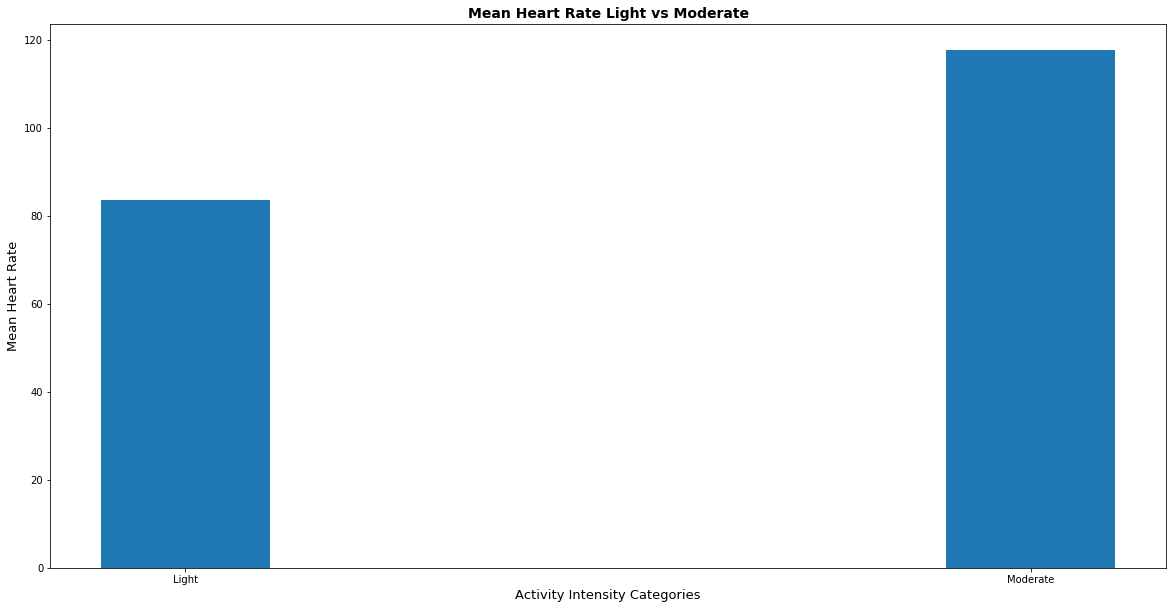

In [24]:
from matplotlib.ticker import FuncFormatter

# Plot the Mean Heart Rate Light vs Moderate
x = np.arange(2)
y = [light.mean(),moderate.mean()]
plt.figure(figsize=(20,10))
plt.bar(x, y,width=0.2,align='center')
plt.xticks(x, ('Light', 'Moderate'))
plt.title('Mean Heart Rate Light vs Moderate', fontsize=14,fontweight='bold')
plt.xlabel('Activity Intensity Categories',fontsize=13)
plt.ylabel('Mean Heart Rate',fontsize=13)
plt.show()

<br>

In order to validate whether the Moderate Mean Heart Rate is significally higher than the light we will conduct a hypothesis test.

<br>


###### Hypothesis Testing for Difference between the Light mean Heart Rate and the Moderate mean Heart Rate:
<br>
- Null Hypothesis H0: The Light mean heart rate (μ1)  is equal to Moderate mean heart rate (μ2) → μ1 - μ2 = 0
<br>
<br>
- Alternative Hypothesis H1: The  Moderate mean heart rate (μ2) is significant higher than the Light mean heart rate (μ1) → μ2 - μ1 > 0
<br>
<br>
- Significance Level α: 0.05
<br>
<br>

In this case, we would assume that the Null Hypothesis is True and we will conduct a Mann-Whitney U test to compute the p-value for the difference between the two mean heart rates. The last step would be to compare the the p-value with our significance value  α and if p<a to reject the null hypothesis and take the alternative one.
<br>
<br>

In [25]:
# Test
Light_vs_Moderate = stats.mannwhitneyu(light,moderate,alternative='two-sided')
print(Light_vs_Moderate)

MannwhitneyuResult(statistic=1717846.0, pvalue=0.0)


According to the result of our hypothesis test p < α. That means that we can reject the null hypothesis and confirm that the Moderate mean heart rate (μ2) is significant higher than the Light mean heart rate (μ1)

##### 2) Hypothesis Testing for Difference between the Moderate and Vigorous activity intensity

Looking at the diagram with the mean heart rate between the Moderate and Vigorous activity intensity we can clearly see that the Vigorous has a higher Mean heart Rate.

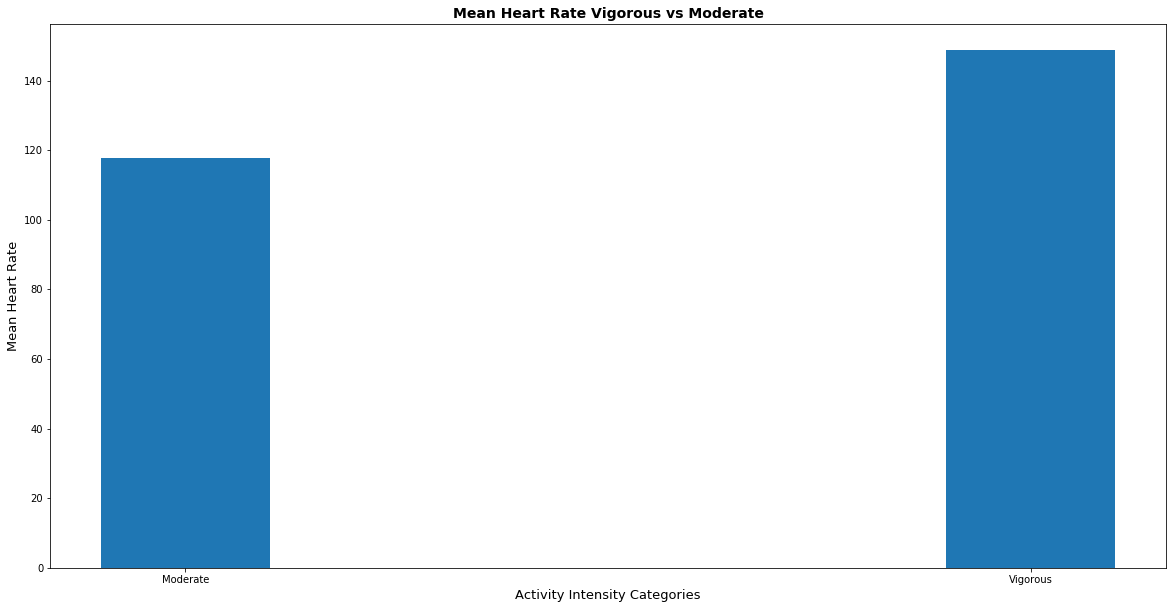

In [26]:
# Plot the Mean Heart Rate Light vs Moderate
x = np.arange(2)
y = [moderate.mean(),vigorous.mean()]
plt.figure(figsize=(20,10))
plt.bar(x, y,width=0.2,align='center')
plt.xticks(x, ('Moderate', 'Vigorous'))
plt.title('Mean Heart Rate Vigorous vs Moderate', fontsize=14,fontweight='bold')
plt.xlabel('Activity Intensity Categories',fontsize=13)
plt.ylabel('Mean Heart Rate',fontsize=13)
plt.show()

<br>

In order to validate whether the Vigorous Mean Heart Rate is significally higher than the Moderate we will conduct a hypothesis test.

<br>

<br>

###### Hypothesis Testing for Difference between the Vigorous mean profit and the Moderate mean Heart Rate:
<br>
- Null Hypothesis H0: The Moderate mean heart rate (μ1)  is equal to Vigorous mean heart rate (μ2) → μ1 - μ2 = 0
<br>
<br>
- Alternative Hypothesis H1: The  Vigorous mean heart rate (μ2) is significant higher than the Moderate mean heart rate (μ1) → μ2 - μ1 > 0
<br>
<br>
- Significance Level α: 0.05
<br>
<br>

In this case, we would assume that the Null Hypothesis is True and we will conduct a Mann-Whitney U test to compute the p-value for the difference between the two mean heart rates. The last step would be to compare the the p-value with our significance value  α and if p<a to reject the null hypothesis and take the alternative one.
<br>
<br>

In [27]:
# Test
Vigorous_vs_Moderate = stats.mannwhitneyu(moderate,vigorous,alternative='two-sided')
print(Light_vs_Moderate)

MannwhitneyuResult(statistic=1717846.0, pvalue=0.0)


According to the result of our hypothesis test p < α. That means that we can reject the null hypothesis and confirm that the Vigorous mean heart rate (μ2) is significant higher than the Moderate mean heart rate (μ1)

<br>

#### 4.3 Hypothesis Testing Results

According to the results of the hypothesis testing section, Heart Rate would be a really important feature for the Activity Intensity Classification as they all significantly differ from each other (Light - Moderate, Moderate - Vigorous).


<br>

### 5. Modelling - Predictions

<br>

The last part of this assignment was the modelling. During this section we tested the performance of different classification models and different features in order to understand which sensor's devices and locations are the most important for the development of an activity tracker device that predicts the intensity (light - moderate - vigorous) of an activity (objective 2).

<br>

#### 5.1 Split the data into training and testing 

The first thing that we had to do was to split the data into training and testing. For the classification problem we used the features dataframe which holds the extracted data from the segments of the initial dataset.

In [28]:
# Split the dataframe into train and test

train=features.sample(frac=0.7,random_state=200) #random state is a seed value
test=features.drop(train.index)

<br>

#### 5.2 Model Selection 
 
According to previous approaches for the same classification problem ΚNN and the boosted decision tree classiﬁers seemed to have a very good performance [2]. During our approach we decided to test our dataset with one of the most well known supervised learning methods for classification, Support Vector Machines. The idea of SVM is that creates a line or a hyperplane to separate the data into classes. In our example these classes would be the Light, Moderate and Vigorous. One basic advantage of the SVM is that they are effective in high dimensional spaces.

<br>

#### 5.3 Run SVM model with the Heart Rate Data

<br>

According to our EDA and Hypo|thesis testing analysis we found out that the heart rate data would be an important feature for the activity intensity classification. For this reason, we wanted to fistly test the accuracy of a model trained with only these data. In order to do the parameter tuning we used the GridSearchCV method from the Scikit Learn library. Using this method we found out that the best parameter tuning is: kernel = 'rbf' and C = 1.

<br>

In [29]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV 


# Data Selection
# --------------
extracted_features = ['Heart_Rate_Mean','Heart_Rate_STD']
labels = 'activity_intensity'

# Training and Testing data preparation
x_train = np.array(train.loc[:, extracted_features])
Y_train = np.array(train.loc[:, labels])

x_test = np.array(test.loc[:, extracted_features])
Y_test = np.array(test.loc[:, labels])


# We have commented out this part of the code as it takes time to be executed.
# As we also stated above if we run the code we will see that the best tuning
# is: kernel: rbf, C = 1

# # Grid Search for parameter tuning
# # ---------------------------------

# # defining parameter range 
#param_grid = {'kernel':('linear', 'rbf'), 'C':[0.1,1,10]}
  
#clf = GridSearchCV(svm.SVC(gamma='auto'), param_grid, refit = True, verbose = 3) 


# # Train the Classifier
# # --------------------

# Initialise a clf with the tuned hyperparameters
clf = svm.SVC(kernel = 'rbf', C = 1, gamma='auto')

# Fit the data into the classifier
clf.fit(x_train, Y_train)

# # Make predictions on the Testing
# # -------------------------------
pred = clf.predict(x_test)

# # Classification Report & Accuracy of the model
# # ----------------------------------------------
print(classification_report(Y_test, pred)) 

print('The overall accuracy of the model is:'+ str(accuracy_score(Y_test, pred)))

              precision    recall  f1-score   support

       light       0.93      0.86      0.90      2243
    moderate       0.81      0.91      0.86      2228
    vigorous       0.84      0.72      0.77       574

    accuracy                           0.87      5045
   macro avg       0.86      0.83      0.84      5045
weighted avg       0.87      0.87      0.87      5045

The overall accuracy of the model is:0.865213082259663


<br>

The results of this attempt validated our assumption that the heart rate would be a really important feature for the activity intensity classification task. Specifically we found out that only with the heart rate data we managed an overall accuracy of 86.5 %. Subsequently, using the other data from the different devices and locations we will try to find the best combination that would achieve the highest accuracy using the most efficient hardware (less devices) and most comfortable design (less body locations).

<br>

#### 5.4 Find the best combination of the sensor's locations and devices

<br>

As we also stated above, one of our objectives was to find out the most efficient design for our activity tracker. Practically that means that we had to find out which combination of devices (accelerometer, magnetometer and gyroscope) and locations (hand, chest, ankle) achieved the optimal result (highest accuracy with less devices and locations). Taking into account that the heart rate is a very important feature for our task we will try to improve its performance by adding extra features to our classifier and evaluate its performance.

<br>

The first step was to test the performance of the SVM model by adding the Accelerometer, Magnetometer and Gyroscope data in order to find out which sensing device contributes more to our classification task. For this reason we run three different models:

- 1 - Heart Rate data + Accelerometer Data
- 2 - Heart Rate data + Gyroscope Data
- 3 - Heart Rate data + Magnetometer Data

Again we used a Grid Search with a Cross validation (3 folds) in order to find the best parameter tuning for each case and avoid overfitting. The best tuning according to the GridsearchCV was:

- 1 - Heart Rate data + Accelerometer Data: C = 10, kernel = rbf
- 2 - Heart Rate data + Gyroscope Data: C = 10, kernel = rbf
- 3 - Heart Rate data + Magnetometer Data: C = 10, kernel = linear

In [30]:
# Find the best sensing device (Accelerometer, Magnetometer, Gyroscope)
# ---------------------------------------------------------------------

# Labels
labels = 'activity_intensity'

# Data Selection: Heart Rate + Accelerometer
# ------------------------------------------
extracted_features_accelerometer = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Hand_Acceleration_1_Mean','Hand_Acceleration_2_Mean','Hand_Acceleration_3_Mean', 'Hand_Acceleration_1_STD','Hand_Acceleration_2_STD','Hand_Acceleration_3_STD',
                                   'Chest_Acceleration_1_Mean','Chest_Acceleration_2_Mean','Chest_Acceleration_3_Mean', 'Chest_Acceleration_1_STD','Chest_Acceleration_2_STD','Chest_Acceleration_3_STD',
                                   'Ankle_Acceleration_1_Mean','Ankle_Acceleration_2_Mean','Ankle_Acceleration_3_Mean', 'Ankle_Acceleration_1_STD','Ankle_Acceleration_2_STD','Ankle_Acceleration_3_STD']


# Training and Testing data preparation Heart Rate + Accelerometer

x_train_accelerometer = np.array(train.loc[:, extracted_features_accelerometer])
Y_train_accelerometer = np.array(train.loc[:, labels])
x_test_accelerometer = np.array(test.loc[:, extracted_features_accelerometer])
Y_test_accelerometer = np.array(test.loc[:, labels])


# Data Selection: Heart Rate + Gyroscope
# ---------------------------------------
extracted_features_gyroscope = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Hand_Gyroscope_1_Mean','Hand_Gyroscope_2_Mean','Hand_Gyroscope_3_Mean', 'Hand_Gyroscope_1_STD','Hand_Gyroscope_2_STD','Hand_Gyroscope_3_STD',
                                   'Chest_Gyroscope_1_Mean','Chest_Gyroscope_2_Mean','Chest_Gyroscope_3_Mean', 'Chest_Gyroscope_1_STD','Chest_Gyroscope_2_STD','Chest_Gyroscope_3_STD',
                                   'Ankle_Gyroscope_1_Mean','Ankle_Gyroscope_2_Mean','Ankle_Gyroscope_3_Mean', 'Ankle_Gyroscope_1_STD','Ankle_Gyroscope_2_STD','Ankle_Gyroscope_3_STD']


# Training and Testing data preparation Heart Rate + Gyroscope

x_train_gyroscope = np.array(train.loc[:, extracted_features_gyroscope])
Y_train_gyroscope = np.array(train.loc[:, labels])
x_test_gyroscope = np.array(test.loc[:, extracted_features_gyroscope])
Y_test_gyroscope = np.array(test.loc[:, labels])


# Data Selection: Heart Rate + Magnetometer
# -----------------------------------------
extracted_features_magnetometer = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Hand_Magnetometer_1_Mean','Hand_Magnetometer_2_Mean','Hand_Magnetometer_3_Mean', 'Hand_Magnetometer_1_STD','Hand_Magnetometer_2_STD','Hand_Magnetometer_3_STD',
                                   'Chest_Magnetometer_1_Mean','Chest_Magnetometer_2_Mean','Chest_Magnetometer_3_Mean', 'Chest_Magnetometer_1_STD','Chest_Magnetometer_2_STD','Chest_Magnetometer_3_STD',
                                   'Ankle_Magnetometer_1_Mean','Ankle_Magnetometer_2_Mean','Ankle_Magnetometer_3_Mean', 'Ankle_Magnetometer_1_STD','Ankle_Magnetometer_2_STD','Ankle_Magnetometer_3_STD']



# Training and Testing data preparation Heart Rate + Magnetometer

x_train_magnetometer = np.array(train.loc[:, extracted_features_magnetometer])
Y_train_magnetometer = np.array(train.loc[:, labels])
x_test_magnetometer = np.array(test.loc[:, extracted_features_magnetometer])
Y_test_magnetometer = np.array(test.loc[:, labels])

In [31]:
# Create  a dictionary that holds all the x_train, Y_train, x_test and Y_test for all devices

devices = {'accelerometer':[x_train_accelerometer,Y_train_accelerometer,x_test_accelerometer,Y_test_accelerometer],
           'gyroscope': [x_train_gyroscope,Y_train_gyroscope,x_test_gyroscope,Y_test_gyroscope],
          'magnetometer': [x_train_magnetometer,Y_train_magnetometer,x_test_magnetometer,Y_test_magnetometer]}

In [32]:
# Run the models for the different devices 

for device in devices:
    print('Classification with Heart Rate and '+device+ ' data :')
    
    
    # # Grid Search for parameter tuning we have commented out cause takes a lot
    # # of time to run. We used the best paramters to tune our models
    # # ------------------------------------------------------------------------

    # # defining parameter range 
    #param_grid = {'kernel':('linear', 'rbf'), 'C':[0.1,1,10]}
    #clf = GridSearchCV(svm.SVC(gamma='auto'), param_grid, refit = True, verbose = 3) 
    
    
    # Initialise a new SVM
    if device == 'accelerometer':
        clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
        
    elif device == 'gyroscope':
        clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
        
    elif device == 'magnetometer':
        clf = svm.SVC(gamma='auto',C=10,kernel='linear')
        
    
    # Fit the data into the classifier
    clf.fit(devices[device][0], devices[device][1])
    
    # # Make predictions on the Testing
    # # -------------------------------
    pred = clf.predict(devices[device][2])
    
    # # Classification Report & Accuracy of the model
    # # ----------------------------------------------
    print(classification_report(devices[device][3], pred)) 
    print('The overall accuracy of the model is:'+ str(accuracy_score(devices[device][3], pred)))
    print('')
    print('')

    # Estimate the best parameters for the gridsearchcv
    #print(clf.best_params_)

Classification with Heart Rate and accelerometer data :
              precision    recall  f1-score   support

       light       1.00      1.00      1.00      2243
    moderate       1.00      1.00      1.00      2228
    vigorous       1.00      1.00      1.00       574

    accuracy                           1.00      5045
   macro avg       1.00      1.00      1.00      5045
weighted avg       1.00      1.00      1.00      5045

The overall accuracy of the model is:0.999603567888999


Classification with Heart Rate and gyroscope data :
              precision    recall  f1-score   support

       light       0.98      0.99      0.99      2243
    moderate       0.99      0.98      0.98      2228
    vigorous       0.99      0.98      0.99       574

    accuracy                           0.99      5045
   macro avg       0.99      0.98      0.99      5045
weighted avg       0.99      0.99      0.99      5045

The overall accuracy of the model is:0.9851337958374629


Classification 

<br>

Looking at the classification reports and accuracies of the different models we can easily conclude that the model that it was trained with the HR and Accelerometer Data had a very good performance reaching an accuracy of almost 99.9%. The model with the HR and Gyroscope data had also a very good performance reaching an accuracy of ≃  98.5%. Finally, the third model that it was trained with the HR and Magnetometer Data had the worst performance achieving an accuracy of ≃ 94.6%. According to these results we understood that the HR and the accelerometer data are sufficient to implement a very robust and good model.

<br>

After exploring the performance of the SVM model on the different sensing devices and colcuding that the best results come up from the accelerometer, we would test the accuracy of our model with the different sensor's locations (hand, chest, ankle). For this section we will use the data from the hand, chest and ankle from the accelerometer device as according to our previous analysis had the best contribution to our classification task.

In order to find out which sensor location or combination of sensor locations is better for our classification task we started by running three different models:

- 1 - Heart Rate data + Accelerometer Data Hand
- 2 - Heart Rate data + Gyroscope Data Chest
- 3 - Heart Rate data + Magnetometer Data Ankle

Again we used a Grid Search with a Cross validation (3 folds) in order to find the best parameter tuning for each case and avoid overfitting. The best tuning according to the GridsearchCV was:

- 1 - Heart Rate data + Accelerometer Data Hand: C = 10, kernel = rbf
- 2 - Heart Rate data + Gyroscope Data Chest: C = 10, kernel = rbf
- 3 - Heart Rate data + Magnetometer Data Ankle: C = 10, kernel = rbf



In [33]:
# Find the best sensor location (Hand, Chest, Ankle)
# --------------------------------------------------

# Labels
labels = 'activity_intensity'

# Data Selection: Heart Rate + Accelerometer_HAND
# -----------------------------------------------
extracted_features_accelerometer_HAND = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Hand_Acceleration_1_Mean','Hand_Acceleration_2_Mean','Hand_Acceleration_3_Mean', 'Hand_Acceleration_1_STD','Hand_Acceleration_2_STD','Hand_Acceleration_3_STD']
x_train_accelerometer_HAND = np.array(train.loc[:, extracted_features_accelerometer_HAND])
Y_train_accelerometer_HAND = np.array(train.loc[:, labels])
x_test_accelerometer_HAND = np.array(test.loc[:, extracted_features_accelerometer_HAND])
Y_test_accelerometer_HAND = np.array(test.loc[:, labels])

# Data Selection: Heart Rate + Accelerometer_CHEST
# -----------------------------------------------
extracted_features_accelerometer_CHEST = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Chest_Acceleration_1_Mean','Chest_Acceleration_2_Mean','Chest_Acceleration_3_Mean', 'Chest_Acceleration_1_STD','Chest_Acceleration_2_STD','Chest_Acceleration_3_STD']
x_train_accelerometer_CHEST = np.array(train.loc[:, extracted_features_accelerometer_CHEST])
Y_train_accelerometer_CHEST = np.array(train.loc[:, labels])
x_test_accelerometer_CHEST = np.array(test.loc[:, extracted_features_accelerometer_CHEST])
Y_test_accelerometer_CHEST = np.array(test.loc[:, labels])


# Data Selection: Heart Rate + Accelerometer_ANKLE
# -----------------------------------------------
extracted_features_accelerometer_ANKLE = ['Heart_Rate_Mean','Heart_Rate_STD',
                                    'Ankle_Acceleration_1_Mean','Ankle_Acceleration_2_Mean','Ankle_Acceleration_3_Mean', 'Ankle_Acceleration_1_STD','Ankle_Acceleration_2_STD','Ankle_Acceleration_3_STD']
x_train_accelerometer_ANKLE = np.array(train.loc[:, extracted_features_accelerometer_ANKLE])
Y_train_accelerometer_ANKLE = np.array(train.loc[:, labels])
x_test_accelerometer_ANKLE = np.array(test.loc[:, extracted_features_accelerometer_ANKLE])
Y_test_accelerometer_ANKLE = np.array(test.loc[:, labels])

In [34]:
# Create  a dictionary that holds all the x_train, Y_train, x_test and Y_test for all sensor
# locations of the Accelerometer device

locations = {'hand':[x_train_accelerometer_HAND,Y_train_accelerometer_HAND,x_test_accelerometer_HAND,Y_test_accelerometer_HAND],
           'chest': [x_train_accelerometer_CHEST,Y_train_accelerometer_CHEST,x_test_accelerometer_CHEST,Y_test_accelerometer_CHEST],
          'ankle': [x_train_accelerometer_ANKLE,Y_train_accelerometer_ANKLE,x_test_accelerometer_ANKLE,Y_test_accelerometer_ANKLE]}

In [35]:
# Run the models for the different sensor locations 

for location in locations:
    print('Classification with Heart Rate and Acceleration '+location+ ' data :')
    
    
    
    
    # Grid Search for parameter tuning we have commented out cause takes a lot
    # of time to run. We used the best paramters to tune our models
    # ------------------------------------------------------------------------

    # defining parameter range 
    # param_grid = {'kernel':('linear', 'rbf'), 'C':[0.1,1,10]}
    # clf = GridSearchCV(svm.SVC(gamma='auto'), param_grid, refit = True, verbose = 3) 
    
    # Initialise a new SVM
    clf = svm.SVC(gamma='auto', C = 10, kernel = 'rbf')
    
    # Fit the data into the classifier
    clf.fit(locations[location][0], locations[location][1])
    
    # Make predictions on the Testing
    # -------------------------------
    pred = clf.predict(locations[location][2])
    
    # # Classification Report & Accuracy of the model
    # # ----------------------------------------------
    print(classification_report(locations[location][3], pred)) 
    print('The overall accuracy of the model is:'+ str(accuracy_score(locations[location][3], pred)))
    print('')
    print('')
    # Estimate the best parameters for the gridsearchcv
    # print(clf.best_params_)
    

Classification with Heart Rate and Acceleration hand data :
              precision    recall  f1-score   support

       light       0.99      1.00      0.99      2243
    moderate       1.00      0.99      0.99      2228
    vigorous       0.99      0.99      0.99       574

    accuracy                           0.99      5045
   macro avg       0.99      0.99      0.99      5045
weighted avg       0.99      0.99      0.99      5045

The overall accuracy of the model is:0.9936570862239842


Classification with Heart Rate and Acceleration chest data :
              precision    recall  f1-score   support

       light       0.99      1.00      1.00      2243
    moderate       1.00      0.99      0.99      2228
    vigorous       0.99      0.99      0.99       574

    accuracy                           0.99      5045
   macro avg       0.99      0.99      0.99      5045
weighted avg       0.99      0.99      0.99      5045

The overall accuracy of the model is:0.9940535183349851


C

Looking at the classification reports and accuracies of the different models we can conclude that all the data from the different sensor locations of the accelerometer in combination with the Heart Rate data produced very accurate results. Specifically:

- Accelerometer Hand Data + HR Data : ≃ 99.4%
- Accelerometer Chest Data + HR Data : ≃ 99.4%
- Accelerometer Ankle Data + HR Data : ≃ 98.9%

Although the combination of all the three different sensor locations of the accelerometer produced even higher results approximating 99.9% we thought that a device with three different sensors locations would not be efficient and user friendly. Our analysis and the results of the modelling section showed that the most accurate device would be an accelerometer tracking the data from the participant's hand or chest as well as their heart rate. This device would be able to predict the participant's activity intensity with an accuracy of around 99.4 %. However because we think that the a hand sensor device would be more comfortable to wear we decided that the best design would be a accelerometer in the participant's hand.

### 6. Conclusion

During this assignment the PAMAP2 dataset was used in order to explore its potential for the development of an activity tracker device. According to the introduction section our aim was to build a device that would be able to predict the intensity of a participant's activity and at the same time have an efficient and user friedly design. Specifically, we set two main objectives that we feel that they both have been met after our analysis.

Our first objective was to check whether the attributes of the dataset can be used to classify the different activities according to their intensity level. According to our results, we could say with confidence that the attributes of the dataset can be used to classify the activities according to their intensity level with a high accuracy.

Our second objective( Find the best combination of the sensing devices and sensor locations to come up with an efficient design of an activity tracking system that would be able to predict the activity intensity) was also met. Specifically, according to our results the most efficient implementation would be a device with an accelerometer that would be located in the participant's hands (sensing device: Accelerometer, sensor location: Hand). This design would be able to accurately predict the 99.4% of the intensity of the participant's activities.


### References

[1] - Jubil T Sunny and Sonia Mary George. Applications and Challenges of Human Activity Recognition using Sensors in a Smart Environment. 2015

[2] - A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. 2012

[3] - https://www.researchgate.net/figure/Different-positions-on-OPPOPTUNITY-PAMAP2-and-DSADS_fig3_322243241

[4] - readme.pdf, PAMAP2 Dataset Documentation.

[5] - https://www.who.int/dietphysicalactivity/physical_activity_intensity/en/

[6] - https://www.hsph.harvard.edu/nutritionsource/mets-activity-table/

[7] - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

[8] - https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html